In [1]:
import os

import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

from config_file import data_path

In [2]:
all_artists = os.listdir(os.path.join(data_path, "plays_per_week"))

In [3]:
def add_artist_column(df, artist_id_file):
    df_artist = pd.read_csv(os.path.join(data_path, "plays_per_week", artist_id_file), parse_dates=True)
    df = df.merge(df_artist, on="year_week", how="left")
    # rename count
    df.rename(columns={"count": f"{artist_id_file.split('.')[0]}"}, inplace=True)
    return df

In [4]:
df = pd.read_csv(os.path.join(data_path, "plays_per_week", all_artists[0]), parse_dates=True)
df.drop(["count"], axis=1, inplace=True)
df.set_index("year_week", inplace=True)
df.head()

""
year_week
2019_30
2019_32
2019_33
2019_34
2019_35


In [5]:
for artist in all_artists:
    df = add_artist_column(df, artist)
df.shape

(230, 1480)

In [6]:
df.head()

,year_week,5rkVyNGXEgeUqKkB5ccK83,1SQRv42e4PjEYfPhS0Tk9E,1wUArE0NhHB8M1bU2WSplY,6L48AOtGmQL1ELLoKML7cS,0Ak6DLKHtpR6TEEnmcorKA,6TLwD7HPWuiOzvXEa3oCNe,22hWz22JAmIhIEp0u1X01L,7eD005d7pGOEYD3eWVRecb,5dbaLmK5SHLLg8Z4CcTJpX,...,7H55rcKCfwqkyDFH9wpKM6,1zNqDE7qDGCsyzJwohVaoX,1qBsABYUrxg9afpMtyoFKz,6JL8zeS1NmiOftqZTRgdTz,2P560DaOMNDUACoH8ZhOCR,41MozSoPIsD1dJM0CLPjZF,7aHLYoLUMdcl0HiT5k0Brz,0elA30wLp3RmiPaGtU2jhQ,6M2wZ9GZgrQXHCFfjv46we,3dBVyJ7JuOMt4GE9607Qin
0,2019_30,1,5,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1,2,2,2,NaN,NaN,1,6
1,2019_32,2,10,1.0,NaN,NaN,NaN,3.0,NaN,2.0,...,1.0,NaN,2,2,3,2,NaN,1.0,7,3
2,2019_33,4,4,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,1,2,2,6,1.0,NaN,8,5
3,2019_34,1,13,1.0,1.0,NaN,2.0,1.0,NaN,1.0,...,NaN,1.0,2,12,1,3,NaN,1.0,19,6
4,2019_35,7,10,1.0,NaN,NaN,1.0,2.0,1.0,4.0,...,NaN,NaN,2,3,1,5,NaN,NaN,15,5


In [7]:
df["year_week"] = pd.to_datetime(df["year_week"]+'0', format='%Y_%W%w')
df.set_index("year_week", inplace=True)
df = df.resample('W').sum()
# df.head()

5rkVyNGXEgeUqKkB5ccK83
year_week
2019-08-04    1
2019-08-11    0
2019-08-18    2
2019-08-25    4
2019-09-01    1
Freq: W-SUN, Name: 5rkVyNGXEgeUqKkB5ccK83, dtype: int64


<Axes: xlabel='year_week'>

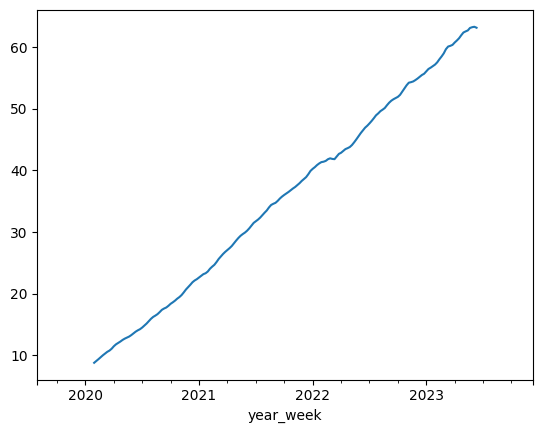

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
artist = all_artists[0].split('.')[0]
print(artist)
print(df[artist].head())
seasonal_decompose(df[artist], model='additive').trend.plot()

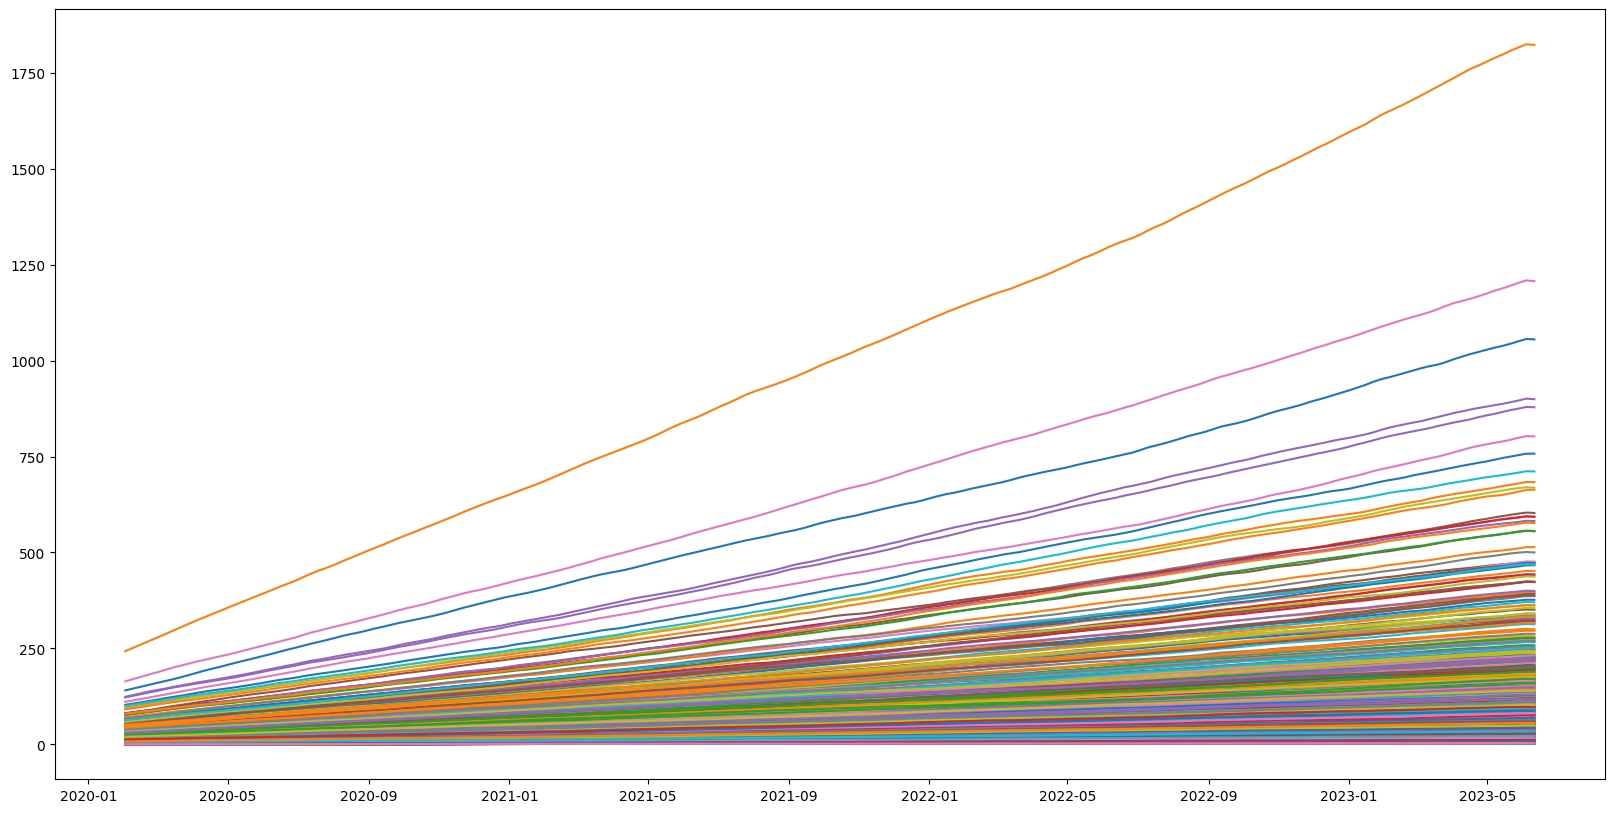

In [9]:
# decompose time series

# df_trends = pd.DataFrame()
# df_seasonal = pd.DataFrame()
# df_residual = pd.DataFrame()

plt.figure(figsize=(20,10))

for artist in all_artists:
    decomposition = seasonal_decompose(df[artist.split('.')[0]], model='additive')
    # df_trends[artist.split('.')[0]] = decomposition.trend
    # df_seasonal[artist.split('.')[0]] = decomposition.seasonal
    # df_residual[artist.split('.')[0]] = decomposition.resid
    plt.plot(decomposition.trend)
# plt.legend()
plt.show()
# df_trends.head()

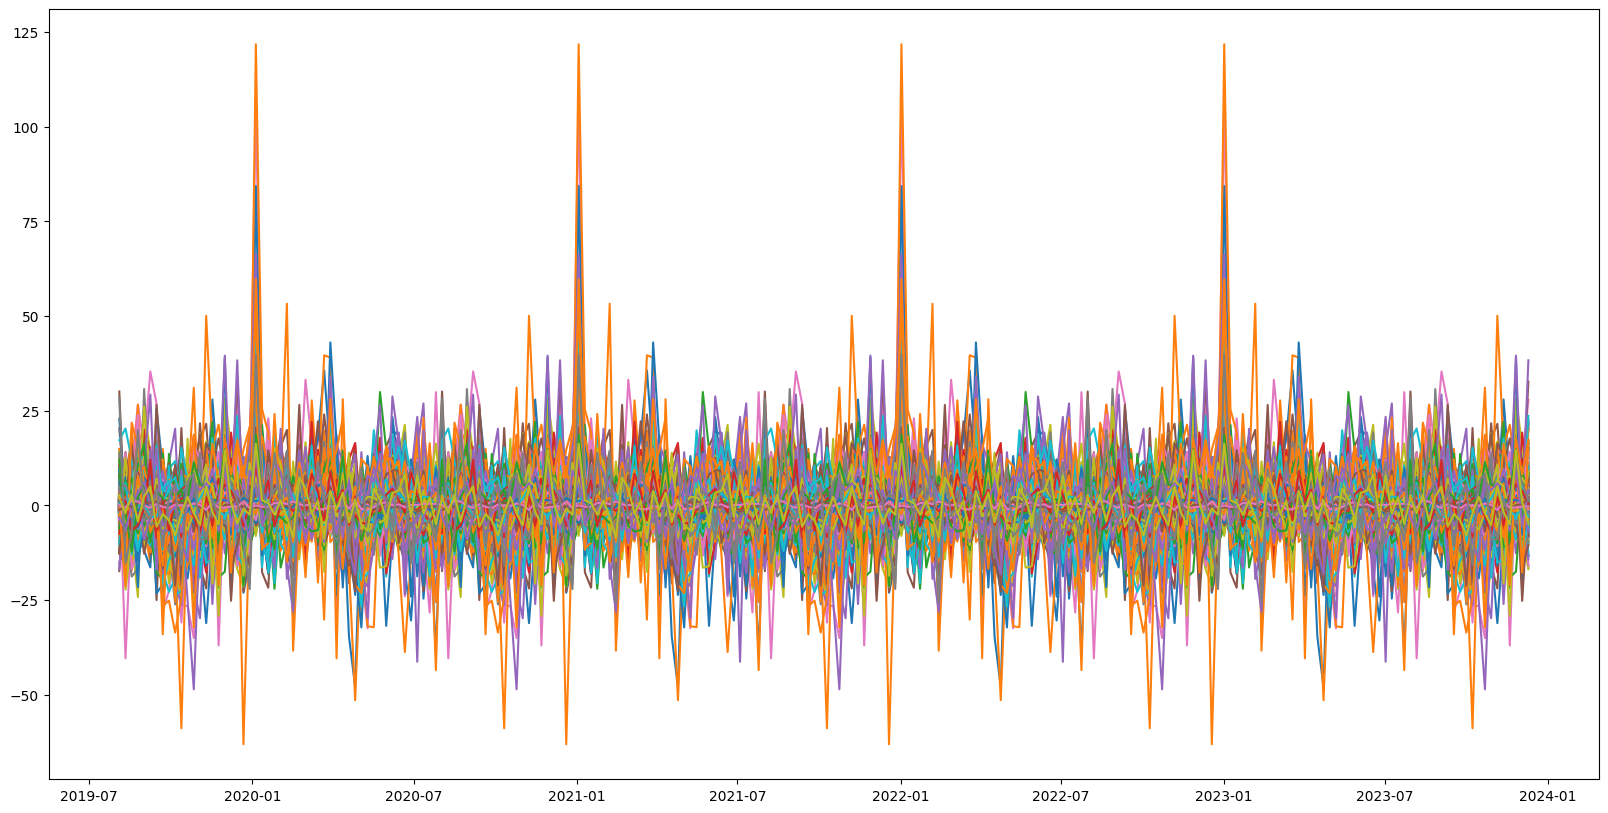

In [10]:
plt.figure(figsize=(20,10))

for artist in all_artists:
    decomposition = seasonal_decompose(df[artist.split('.')[0]], model='additive')
    # df_trends[artist.split('.')[0]] = decomposition.trend
    # df_seasonal[artist.split('.')[0]] = decomposition.seasonal
    # df_residual[artist.split('.')[0]] = decomposition.resid
    plt.plot(decomposition.seasonal)
# plt.legend()
plt.show()

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Decompose time series data
df_trends = pd.DataFrame()
df_seasonal = pd.DataFrame()

for artist in all_artists:
    artist_name = artist.split('.')[0]
    decomposition = seasonal_decompose(df[artist_name], model='additive')
    df_trends[artist_name] = decomposition.trend
    df_seasonal[artist_name] = decomposition.seasonal

print(df_trends.shape, df_seasonal.shape)
df_trends.dropna(inplace=True)
df_seasonal.dropna(inplace=True)

(228, 1479) (228, 1479)


In [19]:
# cluster columns of df_trends
scaler = StandardScaler()
df_trends_scaled = scaler.fit_transform(df_trends)
df_trends_scaled = pd.DataFrame(df_trends_scaled, columns=df_trends.columns)
# transpose df_trends_scaled so cluster will be 1480 rows and number of clusters columns
df_trends_scaled = df_trends_scaled.T

df_cluster = pd.DataFrame()
for i in range(2, 10):
    # cluster columns/artists' trends of df_trends so cluster will 1480 rows and number of clusters columns
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_trends_scaled)
    df_cluster[i] = kmeans.labels_
    
df_cluster.shape

(1479, 8)

In [20]:
df_cluster

,2,3,4,5,6,7,8,9
0,1,0,1,0,5,1,6,0
1,0,1,3,1,0,3,0,5
2,0,1,3,1,0,3,0,2
3,1,2,2,3,4,0,7,3
4,0,1,3,1,0,3,0,2
...,...,...,...,...,...,...,...,...
1474,1,0,1,0,1,5,6,7
1475,0,2,2,2,3,4,4,1
1476,1,0,1,3,4,0,3,3
1477,1,0,1,0,1,1,6,0


each row is artist, each column is cluster in split to n clusters